루브릭

|평가문항|상세기준|
|:---|:----|
|1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?|목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용해진다.|
|2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?|평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었다.|
|3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?|최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.|

# Step1. 검증용 데이터셋 준비
+ OCR의 성능에 영향을 미치는 요인들에는 텍스트의 모양과 크기, 배치, 노이즈 등 이 있습니다.
+ 손글씨를 중심으로 하여 size, placement, noize 세 가지 항목으로 분류하여 이미지를 로드합니다.


In [1]:
#- 글씨 크기
size = [
    'https://source.unsplash.com/U2eUlPEKIgU/640x460',
    'https://source.unsplash.com/y21qF5V_k6Q',
    'https://source.unsplash.com/xZcWyykjZ6I',
]

#- 가로, 세로, 곡선 등 다양한 배치 
placement = [
    'https://source.unsplash.com/jTWdvjPx3c4',
    'https://source.unsplash.com/POMpXtcVYHo',
    'https://source.unsplash.com/c2x94-kmQcQ',
    'https://source.unsplash.com/IhWYiwSxm8g',
]

#- 노이즈
noize = [
    
    'https://source.unsplash.com/vIacHQ5ZqxY',
    'https://source.unsplash.com/_e1Y2YJiG7E',
    'https://source.unsplash.com/t56OrP9DSHo',
    'https://source.unsplash.com/J3yas-8gtWA'
]

#- 손글씨가 아닌 이미지(추가)
n_handwritten = [
    'https://source.unsplash.com/M7mu6jXlcns/640x460',
    'https://source.unsplash.com/6jsp4iHc8hI/640x460',
    'https://source.unsplash.com/j9JoYpaJH3A',
    'https://source.unsplash.com/eBkEJ9cH5b4'
]

# keras-ocr

In [2]:
import matplotlib.pyplot as plt
import keras_ocr

#- keras-ocr이 detector와 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [3]:
def keras_ocr(image_urls):
    import keras_ocr
    import re
    images = [ keras_ocr.tools.read(url) for url in image_urls]
    prediction_groups = [pipeline.recognize([url]) for url in image_urls]
    texts = []
    
    
    for i in prediction_groups:
        #print(i)
        regex = re.compile(r"\'(.+?)\'") #- '' 로 감싸져있는 이미지에서 추출한 문자만 모두 찾아냅니다.
        text = regex.findall(str(i))
        #print(text)
        texts.append(text)
        
    print(texts)
        
    
  
    #- Plot the predictions
    fig, axs = plt.subplots(nrows=len(images), figsize=(20,20))
    for idx, ax in enumerate(axs):
            keras_ocr.tools.drawAnnotations(image=images[idx],
                                           predictions=prediction_groups[idx][0], ax=ax)
    
    return texts

[['dream', 'bie'], ['tf', 'you', 'jono', 'believe', 'like', 'in', 'me', 'believe', 't', 'in', 'you', 'they', 'wil1', 'remember', 'us', 'r', 'dnn', 'ta'], ['share', 'love', 'not', 'hate']]


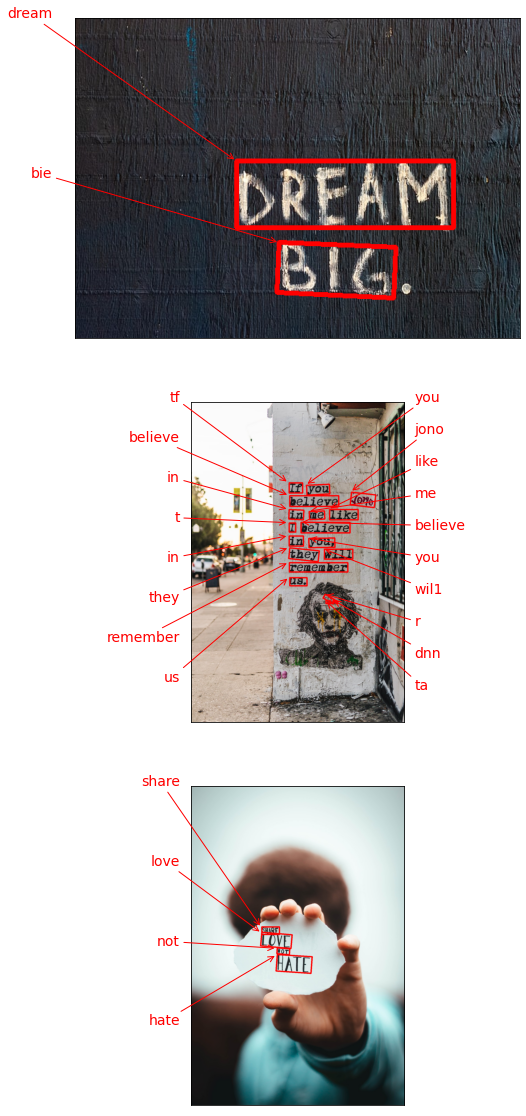

In [4]:
keras_size = keras_ocr(size)

[['shume', 's', 'where', 'uour', 'story', 'begins', 'an'], ['lo', 'en', 'ss', 'e', 'o', 'eis', 'cs', 'oi', 'se', 'd', 'r', 's', '2', 'w'], ['s'], ['m', 'r', 'so', 'un', 't', 'ten', 'e', 'co', 'rs', 'se']]


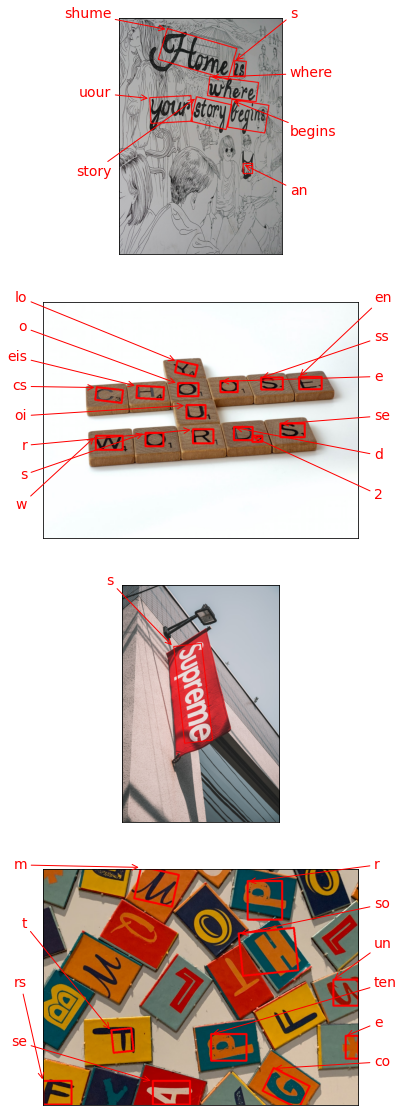

In [5]:
keras_placement = keras_ocr(placement)

[['hy', 'caed', 'm', 'mornings'], ['on', 'mang', 'csdis', 'ro', 'satos'], ['faltifilles', 'vitleiess', 'el', 'ontron', 'e'], ['cra', 'todd', 'yol', 'all', 'won', 'tove', 's', 'aeel', 'bd', 'bd', 'sove', 'cray', 'todd', 'copay', 'codd']]


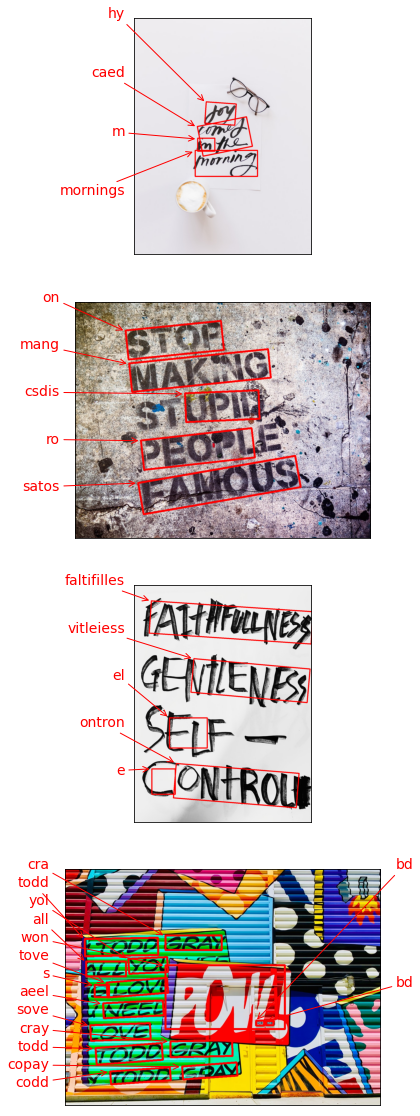

In [6]:
keras_noize = keras_ocr(noize)

[['up', 'wake', 'me', 'wheni', 'im', 'famous'], ['8624', 'new', 'york', 'central', 'system'], ['write', 'without', 'fearo', 'edit', 'without', 'mercya', 'webca', 'matlhonl'], ['youre', 'not', 'lost', 'youre', 'here']]


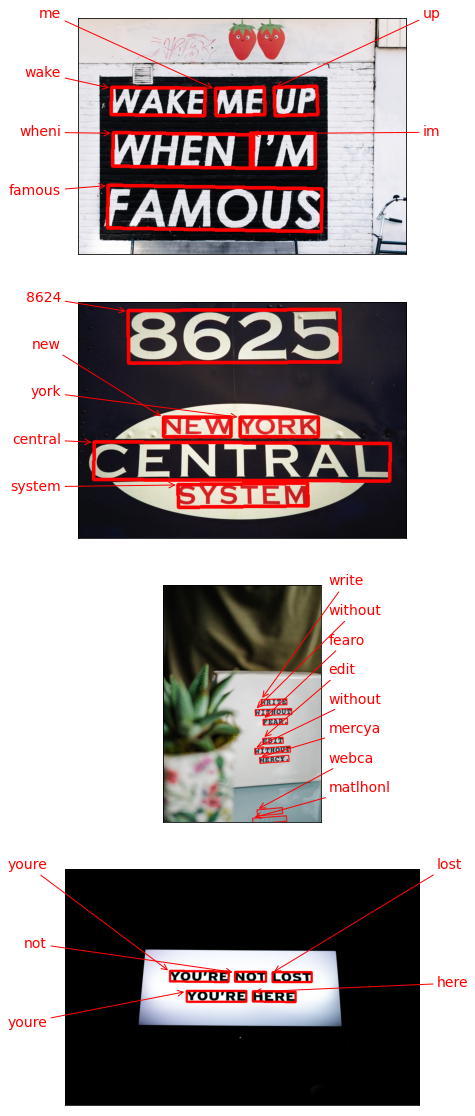

In [7]:
keras_n_handwritten = keras_ocr(n_handwritten)

# Tesseract

In [8]:
#- 3) 테서랙트로 문자 검출 및 이미지 자르기(detection)
import io
import requests
from PIL import Image

import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_url, output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    img_resp = requests.get(image_url)
    image = Image.open(io.BytesIO(img_resp.content))

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            #print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [9]:
#- 테서랙트로 잘린 이미지에서 단어 인식하기

def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    texts = []
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        result = recognized_data['text']
        arr = result.split('\n')[0:-1] 
        result = '\n'.join(arr)
        texts.append(result)
        
        #print(recognized_data['text'])
    print(texts)
    return texts

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.

# 테스트 결과 정리

In [10]:
tesseract_size = []
tesseract_placement = []
tesseract_noize = []
tesseract_n_handwritten = []

In [11]:
#- 비교분석을 위해 각 항목별 데이터를 저장할 리스트를 생성합니다.
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'

for i in size:
    cropped_image_path_list = crop_word_regions(i, work_dir)
    tesseract_ocr_txt = recognize_images(cropped_image_path_list)

    tesseract_size.append(tesseract_ocr_txt)
    
for i in placement:
    cropped_image_path_list = crop_word_regions(i, work_dir)
    tesseract_ocr_txt = recognize_images(cropped_image_path_list)

    
    tesseract_placement.append(tesseract_ocr_txt)
       

for i in noize:
    cropped_image_path_list = crop_word_regions(i, work_dir)
    tesseract_ocr_txt = recognize_images(cropped_image_path_list)

    
    tesseract_noize.append(tesseract_ocr_txt)
    
for i in n_handwritten:
    cropped_image_path_list = crop_word_regions(i, work_dir)
    tesseract_ocr_txt = recognize_images(cropped_image_path_list)

    tesseract_n_handwritten.append(tesseract_ocr_txt)

['-', 'eae', ',', 'BiG.']
['bo WE', 'ay', '—— rl', ':', 'wal tows', 'Lory', '', 'iay', 'in', 'Re', 'Sine;', '@', 'I believe', '11', 'you,', 'eo', 'they', 'will', '', '', 'remember', 'ANP aE', '—_ fC', 'Wii', '', 'WI', '5 (']
['e 4']
['yy 2', 'oe', '3', '7', '\\ |', 'fl', '', 'LF', 'V4', '', 'ray', 'sf', 'i', '', '\\A\\', '', 'I', 'mT', '4', '(', 'A', '|', '‘ La', '/\\', '', '', 'ry', '', 'i', 'LA \\ ies', ')', 'd', '', '', '|', 'SY', '—', 's', 'i', 'N\\', '\\\\ei', 'i', '\\', 'u/s', '}', '', '|', '|', 'ae', 'Mf', 'Q inl', '', 'I 7S', '', '']
['']
['\\', 'yy', 'Ns', '', '-', ';', 'oes', '\\.', ',', '']
['se:']
['g']
['3)']
['']
['ec EO — Imm', ',?.', '', 'es', 'Mas LZ.', '“Ge', 'Le', '4', '', '']
['']
['Sic pPbo.', '>', 'eo a a', 'ae', '=', 'CENTRAL', '~we', 'mh SYSTEM', 'eee']
['WRITE', 'WITHOUT', 'FEAR.', 'EDIT', 'WITHOUT', 'MERCY.', '——ea', '']
["YOU'RE", 'NOT', 'LOST', "YOU'RE", 'reer Ee.', "| “you're Here"]


In [12]:
import pandas as pd

dict_size = {'keras_ocr':keras_size, 'tesseract_ocr':tesseract_size}
dict_placement = {'keras_ocr':keras_placement, 'tesseract_ocr':tesseract_placement}
dict_noize = {'keras_ocr':keras_noize, 'tesseract_ocr':tesseract_noize}
dict_n_handwritten = {'keras_ocr':keras_n_handwritten, 'tesseract_ocr':tesseract_n_handwritten}

df_size = pd.DataFrame(dict_size)
df_placement = pd.DataFrame(dict_placement)
df_noize = pd.DataFrame(dict_noize)
df_n_handwritten = pd.DataFrame(dict_n_handwritten)

In [13]:
import os
from skimage import io
import matplotlib.pyplot as plt
def url2img(urls,figsize=(12,4)):
    
    plt.rcParams["figure.figsize"] = [9, 3.50]
    plt.rcParams["figure.autolayout"] = True
    fig = plt.figure(figsize=figsize)
    rows = 1
    cols = len(urls)
    i = 1
    
    for j, url in enumerate(urls):
        a = io.imread(url)
        ax = fig.add_subplot(rows, cols, i)
        
        plt.title(f"picture{j}",fontsize=20)
        plt.axis('off')
        plt.imshow(a)
        i += 1
    fig.tight_layout()    
    plt.show()

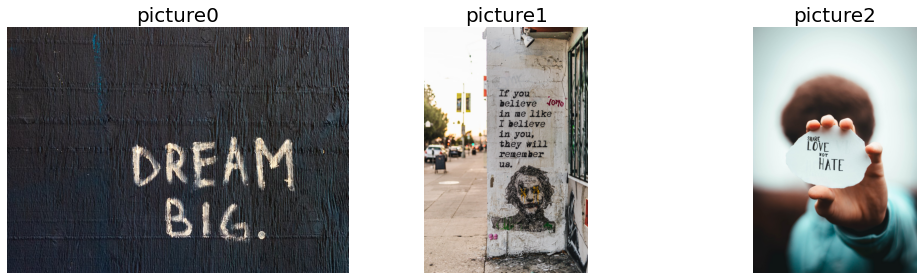

,keras_ocr,tesseract_ocr
0,"[dream, bie]","[-, eae, ,, BiG.]"
1,"[tf, you, jono, believe, like, in, me, believe...","[bo WE, ay, —— rl, :, wal tows, Lory, , iay, i..."
2,"[share, love, not, hate]",[e 4]


In [14]:
url2img(size,(16,4))
df_size

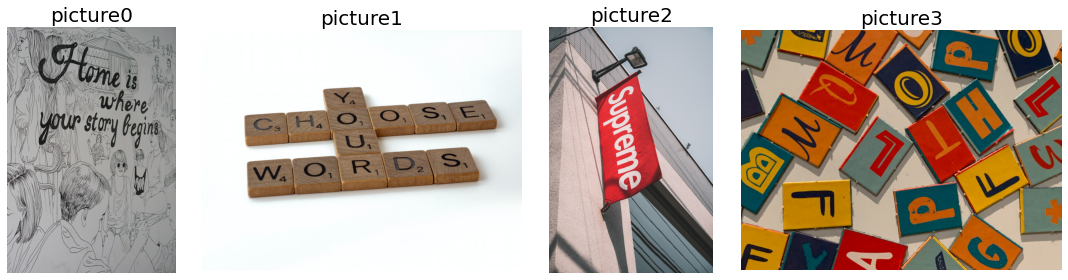

,keras_ocr,tesseract_ocr
0,"[shume, s, where, uour, story, begins, an]","[yy 2, oe, 3, 7, \ |, fl, , LF, V4, , ray, sf,..."
1,"[lo, en, ss, e, o, eis, cs, oi, se, d, r, s, 2...",[]
2,[s],"[\, yy, Ns, , -, ;, oes, \., ,, ]"
3,"[m, r, so, un, t, ten, e, co, rs, se]",[se:]


In [15]:
url2img(placement,(16,4))
df_placement

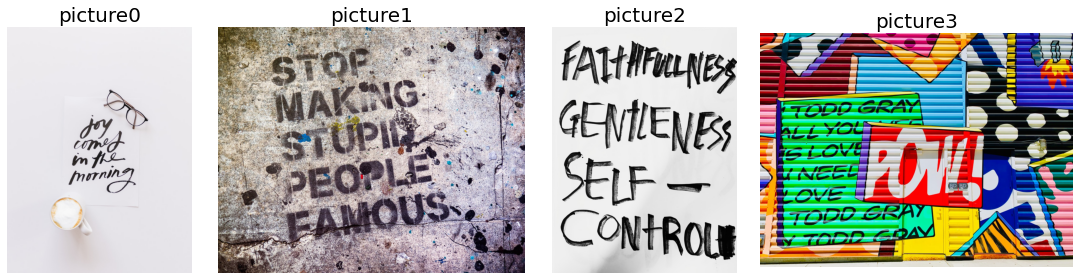

,keras_ocr,tesseract_ocr
0,"[hy, caed, m, mornings]",[g]
1,"[on, mang, csdis, ro, satos]",[3)]
2,"[faltifilles, vitleiess, el, ontron, e]",[]
3,"[cra, todd, yol, all, won, tove, s, aeel, bd, ...","[ec EO — Imm, ,?., , es, Mas LZ., “Ge, Le, 4, , ]"


In [16]:
url2img(noize,(16,4))
df_noize

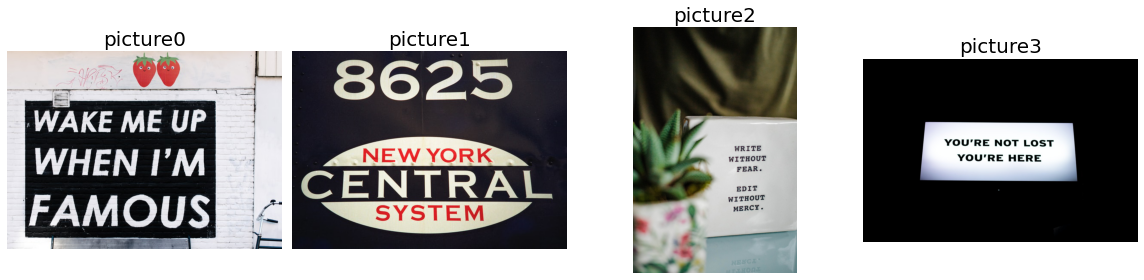

,keras_ocr,tesseract_ocr
0,"[up, wake, me, wheni, im, famous]",[]
1,"[8624, new, york, central, system]","[Sic pPbo., >, eo a a, ae, =, CENTRAL, ~we, mh..."
2,"[write, without, fearo, edit, without, mercya,...","[WRITE, WITHOUT, FEAR., EDIT, WITHOUT, MERCY.,..."
3,"[youre, not, lost, youre, here]","[YOU'RE, NOT, LOST, YOU'RE, reer Ee., | “you'r..."


In [17]:
url2img(n_handwritten,(16,4))
df_n_handwritten

# 결과 및 해석

+ Keras와 Tesseract를 비교했을 때 Keras는 약간 부족해도 위치는 잘 찾았지만,
Tesseract의 경우 문자를 잘 찾지 못하는 경우도 많다
+ 따라서 좀 더 성능이 정확한 모델은 Keras-OCR인 것 같다.